# Problem
N Queens
puzzle is the problem of placing n chess queens on an n × n  hessboard so that no two queens threaten each other; thus, a  solution requires that no two queens share the same row, column, or diagonal.

For solving this problem we will use a type of genetic algorithms named Mememtic ALgorithms which uses a local search technique to reduce the likelihood of the premature convergence. Most of this algorithm is similar to our last homework so i won't get into their details

Now to start , we have to import the needed libraries first and create our best answers list

In [17]:
import pandas as pd
import random

best_fitness = []
best_boards = []

# Fitness
In this quetion we will define fitness as the number of pair of queens that threaten eachother, and we will sort a dataframe based on this fitness so that the least fitness is at the top.

In [18]:
def calculate_fitness(board):
    n = len(board)
    fit = 0
    first_arr = [0]*(2*n)
    second_arr = [0]*(2*n)
    
    for i in range(n):
        first_arr[n-1+(board[i]-i)]+=1
        second_arr[i+board[i]]+=1
    for i in range(2*n):
        fit += int((first_arr[i]*(first_arr[i]-1))/2)
        fit += int((second_arr[i]*(second_arr[i]-1))/2)
    
    return fit


In [19]:
def fitness_sort(df, new_gen):
    for i in range(len(df)):
        df.loc[i, "fitness"] = calculate_fitness(df.loc[i, "boards"])
    
    if(new_gen == True):
        min = df["fitness"].idxmin()
        best_fitness.append(df.loc[min, 'fitness'])
        best_boards.append(df.loc[min, 'boards'])
    df = df.sort_values(by=["fitness"],ascending=True)
    df = df.reset_index()
    result = []
    for i in range(len(df)):
        result.append(df.loc[i, 'boards'])
    df = pd.DataFrame({'boards' : result})
    return df

# Breed and Mutation
The breed and mutation function is just like the ones I used in the last homework(TSP).
Which means for breeding I used a break point and choose one side from first parent an the rest from second parent. For mutation I used swap mutation.

In [20]:
def breed(parentA, parentB):
    child = []
    break_point = random.randint(0, len(parentA)-1)
    for i in range(len(parentA)):
        if i <= break_point:
            child.append(parentA[i])
        else:
            child.append(parentB[i])
    for i in range(len(child)):
        for j in range(i+1, len(child)):
            if child[i] == child[j]:
                return None
    return child

#swap
def mutate(child):
    x = random.randint(0, len(child)-1)
    y = random.randint(0, len(child)-1)
    first_gene = child[x]
    second_gene = child[y]
    child[y] = first_gene
    child[x] = second_gene
    return child


# Local Search
The most important part of the memetic algorithm, is Local search function. In this function we will check a neighbor for all of the children and if the neighbor of the child has a better fitness we will use the neighbor in our next geenration. Also for finding the childs neighbor I used the swap mutation , which gave me a better result than other functions i used such as Insert Mutation.

In [21]:
def localSearch(childs):
    if len(childs) == 0:
        return childs
    for child_indx in range(len(childs)):
        best_fitness = calculate_fitness(childs[child_indx])
        for i in range(1):
            ans = mutate(childs[child_indx])
            fitness = calculate_fitness(ans)
            if  fitness < best_fitness:
                best_fitness = fitness
                childs[child_indx] = ans
          
    return childs


# New Generation
In memetic algorithms we will determine our next generation somewhat similar to a normal genetic algorithm, except in MA after the mutation we will run our localsearch functin to find if a better result exists in our neighborhood.

In [22]:
def next_generation(df, population):
    childs = []
    new_childs_number = len(df)//2 #random.randint(0, len(df)-1)
    df = fitness_sort(df, False)
    new_board_list = []
    while(len(childs)< new_childs_number):
        a_parent_indx = random.randint(0, len(df)//2)
        b_parent_indx = random.randint(0, len(df)//2)
        result = breed(df.loc[a_parent_indx, 'boards'], df.loc[b_parent_indx, 'boards'])
        if result:
            childs.append(result)
    mutate_number = len(childs)//2 #random.randint(0, new_childs_number)
    for i in range(mutate_number):
        child_indx = random.randint(0, len(childs)-1)
        childs[child_indx] = mutate(childs[child_indx])
    childs = localSearch(childs)
    replace = 0
    # childs_df = pd.DataFrame({'boards' : childs})
    for i, e in reversed(list(enumerate(df["boards"]))):
        if replace < len(childs):
            new_board_list.append(childs[replace])
            replace += 1
        else:
            new_board_list.append(df.loc[i, 'boards'])
    df = pd.DataFrame({'boards' : new_board_list})
    return df


# Initial population
Since our genes in this question are actually a permutation of n( n beeing the number of queens), for our first geenration we will randomly create diffrent permutations of n for our initial population.

In [31]:
def NqueensProblem(population, board_size):
    board = []
    queens = []
    for i in range(board_size):
        queens.append(i)

    for i in range (population):
        board.append(random.sample(queens, board_size))

    df = {"boards" : board}
    df = pd.DataFrame(df)
    return N_queens_MA(df, population)

def N_queens_MA(df, population):
    while(True):
        df = fitness_sort(df, True)
        print(min(best_fitness))
        if min(best_fitness) == 0:
            break
        df = next_generation(df, population)
    print(min(best_fitness))
    print(best_boards[best_fitness.index(min(best_fitness))])
    return best_boards[best_fitness.index(min(best_fitness))]


# Test cases
Now we will run the algorithm for diffrent test cases:

In [24]:
board_100 = NqueensProblem(population=3, board_size=100)

Streaming output truncated to the last 5000 lines.
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2

# Other Examples
**Example 1**
First we will run the extra for 300 queens

In [25]:
best_fitness = []
best_boards = []
board_300 = NqueensProblem(population=3, board_size=300)

Streaming output truncated to the last 5000 lines.
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1

**Example 2**
Now we will create the plot for 10 and 20 and 30 queens

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def PlotFunction(n, result):
  print(result)
  board = []
  for i in range(n):
    row = []
    for j in range(n):
      if j == result[i]:
        row.append(2)
      elif j%2 == i%2:
        row.append(0)
      else:
        row.append(1)
    board.append(row)
  plt.figure(figsize=(n, n))
  plt.imshow(board, cmap = "gray")
  plt.axis(False)
  plt.show


2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0


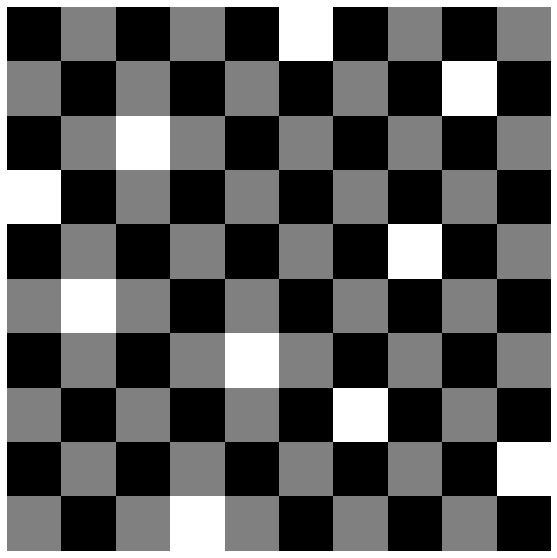

In [34]:
best_fitness = []
best_boards = []
board_10 = NqueensProblem(population=3, board_size=10)
PlotFunction(10, board_10)

12.0
12.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
7.0
7.0
7.0
7.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.

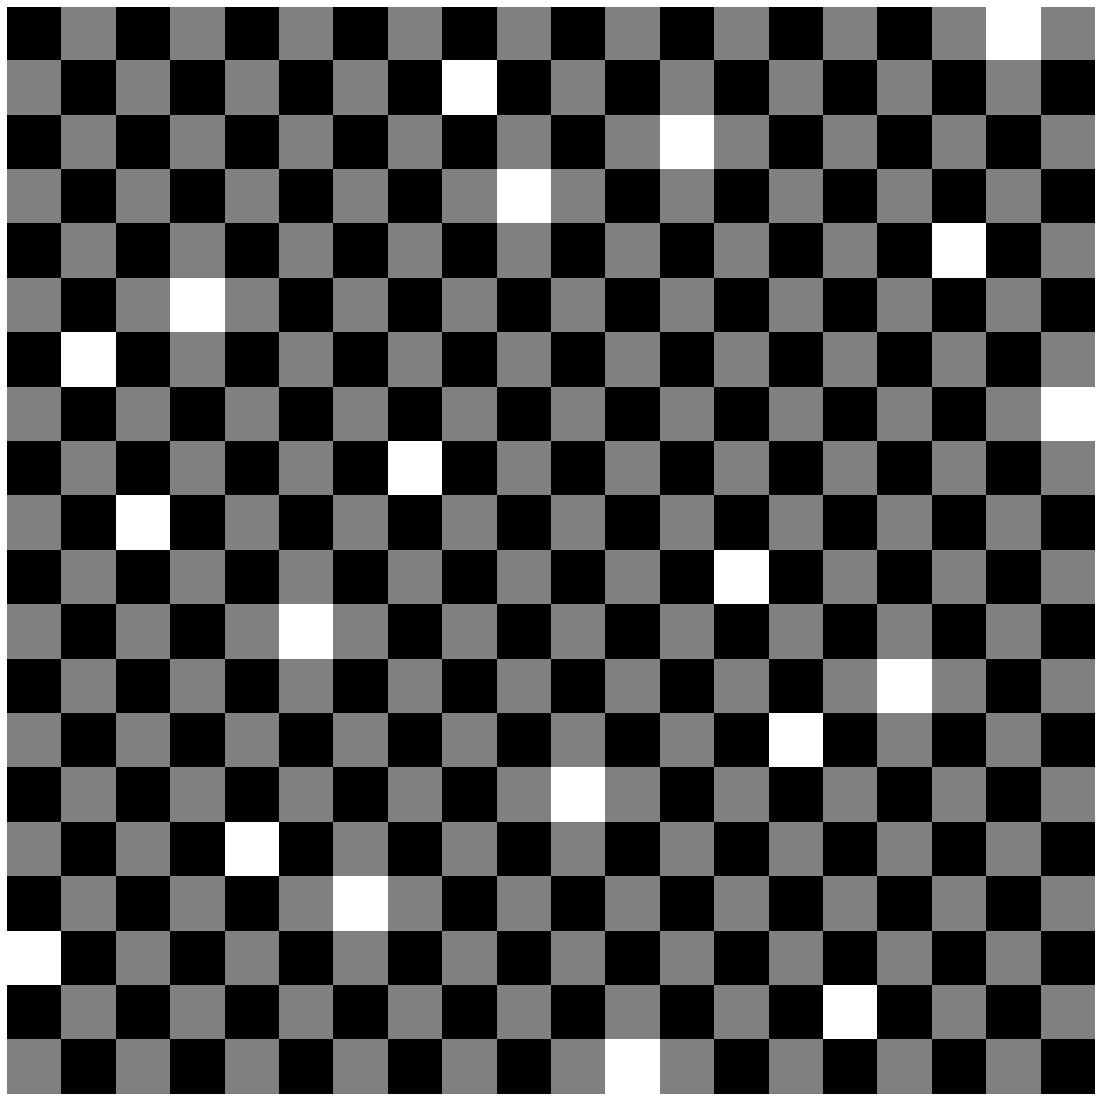

In [36]:
best_fitness = []
best_boards = []
board_20 = NqueensProblem(population=4, board_size=20)
PlotFunction(20, board_20)

16.0
16.0
14.0
13.0
13.0
13.0
13.0
11.0
11.0
10.0
10.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2

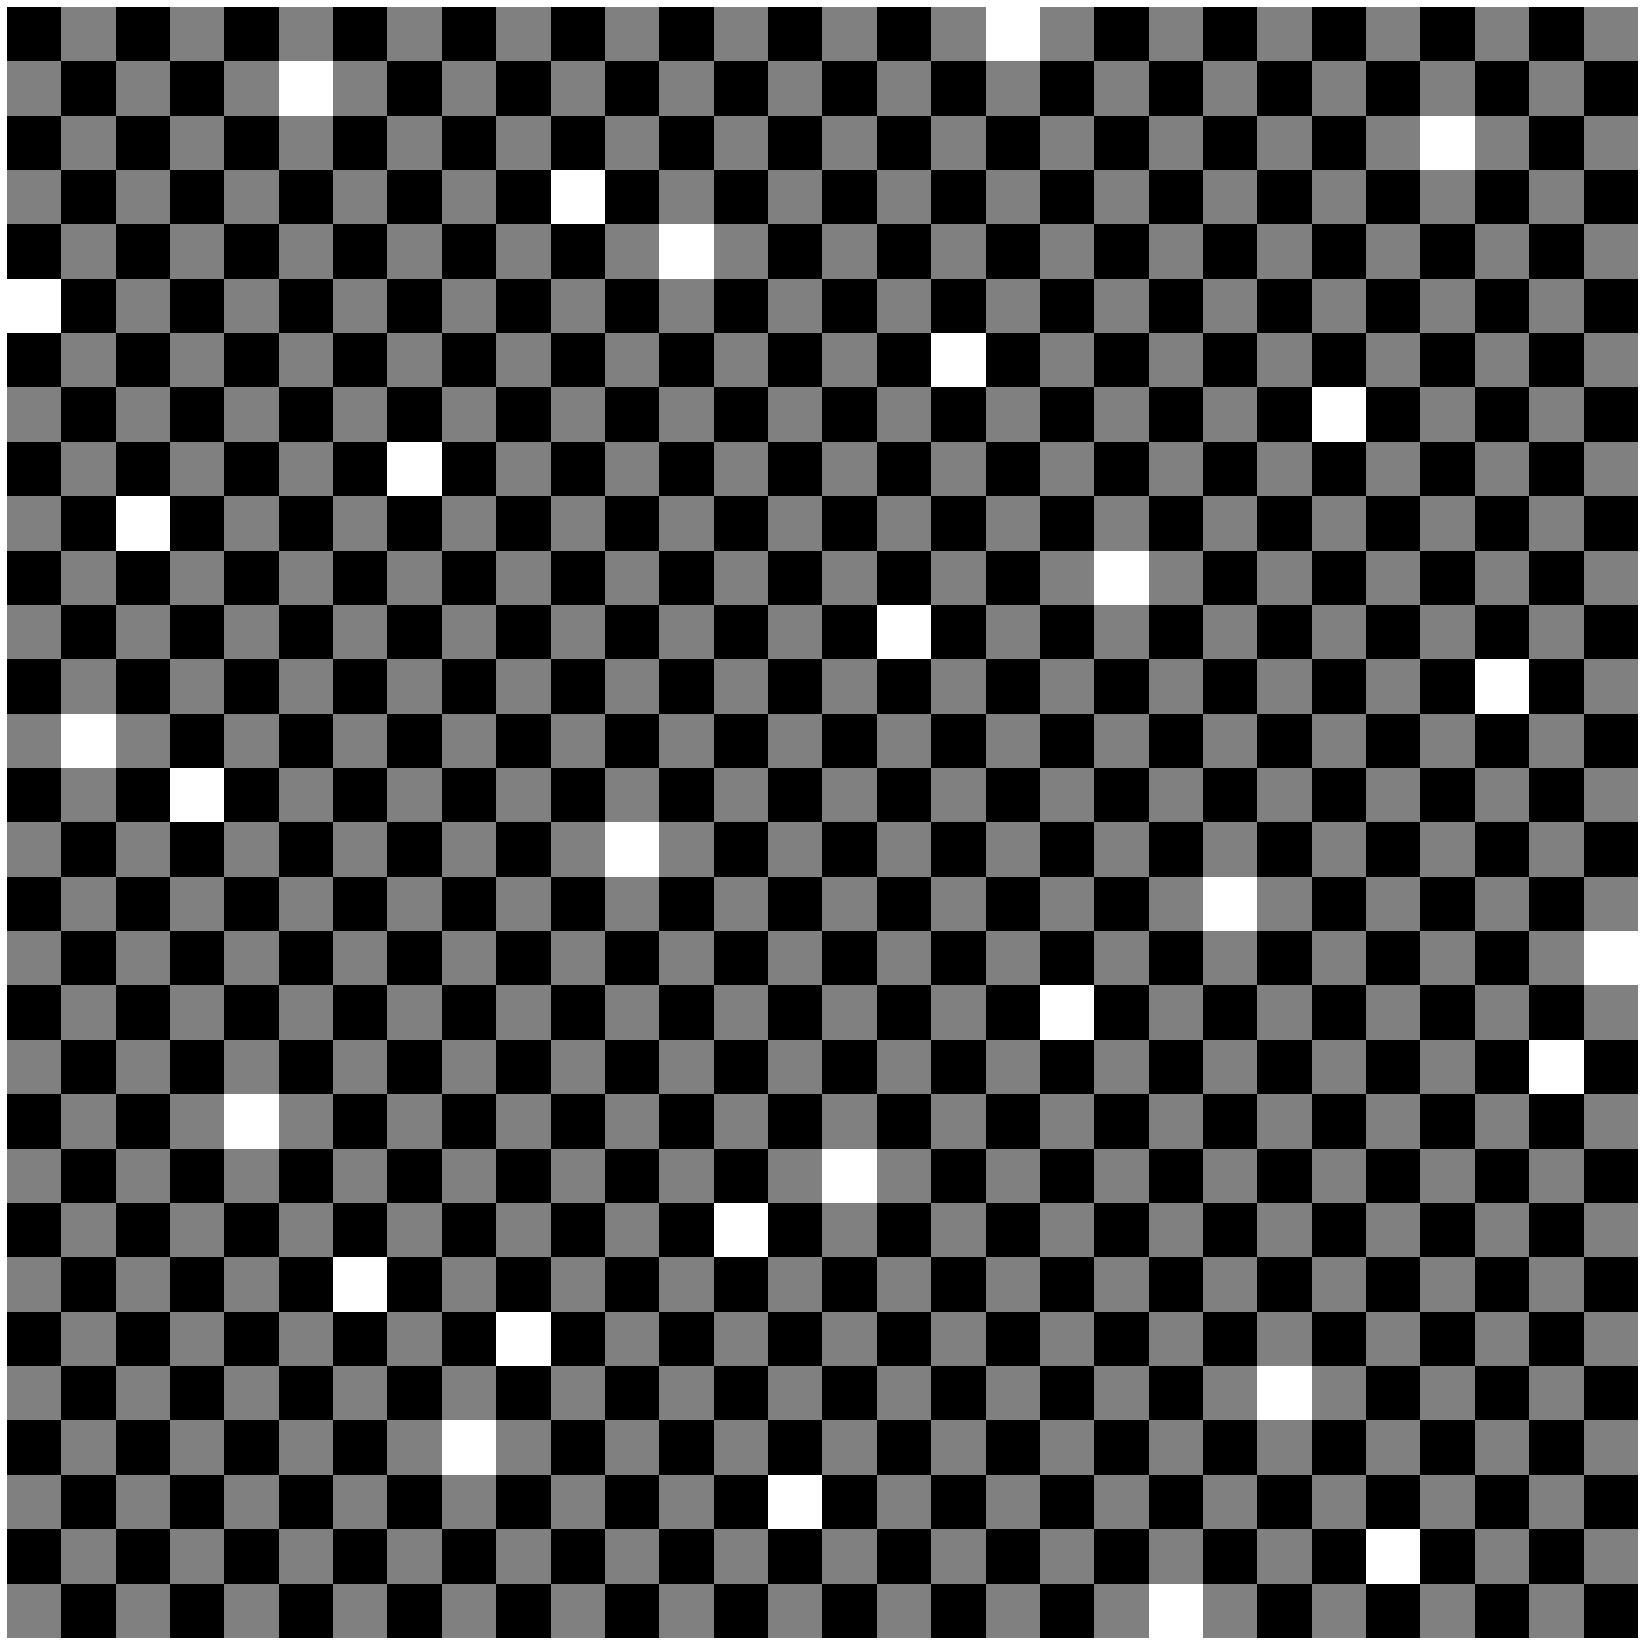

In [37]:
best_fitness = []
best_boards = []
board_30 = NqueensProblem(population=6, board_size=30)
PlotFunction(30, board_30)